# Email Classification Problem:

## *Step-1 :* 
*Importing the libraries*

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

## *Step-2:*
*Reading the Spam Data*

In [0]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [0]:
import io
emails = pd.read_csv(io.StringIO(uploaded['spam.csv'].decode('utf-8')))

## *Step-3:*
*Data Exploration*

In [0]:
emails.head() #Understanding the Data

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [0]:
emails.shape #Dimensions of the Data

(5572, 2)

In [0]:
emails.isnull().sum() #If there are nulls present in the Data

text      0
target    0
dtype: int64

In [0]:
emails.info() #Understanding the Data Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
text      5572 non-null object
target    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [0]:
#Checking for Unique Records: Hence converting the records in lower case first
 def low(text):
    # converting text to lowercase
    text = text.lower()
    return text


In [0]:
emails['text'] = emails['text'].apply(low)
print(emails.head())

                                                text target
0  go until jurong point, crazy.. available only ...    ham
1                      ok lar... joking wif u oni...    ham
2  free entry in 2 a wkly comp to win fa cup fina...   spam
3  u dun say so early hor... u c already then say...    ham
4  nah i don't think he goes to usf, he lives aro...    ham


In [0]:
emails.describe() # 404 duplicate records are present in the data

,text,target
count,5572,5572
unique,5168,2
top,"sorry, i'll call later",ham
freq,30,4825


In [0]:
# Overall Number of Duplicates:
duplicated = emails[emails.duplicated(['text'])]
print(duplicated.shape)
#Duplicates which are spam
duplicated_spam = duplicated[duplicated['target'] == 'spam']
print(duplicated_spam.shape)

(404, 2)
(94, 2)


In [0]:
len(emails['text'].unique().tolist())

5168

### Removing redundant data.

In [0]:
emails_v1 = emails.drop_duplicates() #Dropping duplicate records

In [0]:
#emails_v1 = emails # Just to preserve the data till this point

In [0]:
emails_v1.shape

(5168, 2)

In [0]:
spam = emails_v1[emails_v1.iloc[:,1] == 'spam']

In [0]:
spam.shape

(653, 2)

In [0]:
ham = emails_v1[emails_v1.iloc[:,1] == 'ham']

In [0]:
ham.shape

(4515, 2)

## Question-1:
### *Calculate the percentage of text in data shared which are spam?*

In [0]:
def text_spam(sp_data):
    spam_per = (int(spam.shape[0])/int(sp_data.shape[0]))*100
    return spam_per

In [0]:
spam_percentage = text_spam(emails_v1)
print("Spam Text Percentage: {}%".format(round(spam_percentage,2)))

Spam Text Percentage: 12.64%


In [0]:
ham_percentage = 100-spam_percentage
print("Ham Text Percentage: {}%".format(round((ham_percentage),2)))

Ham Text Percentage: 87.36%


### Data Visualisation:
#### *Spam vs Ham Percentage:*

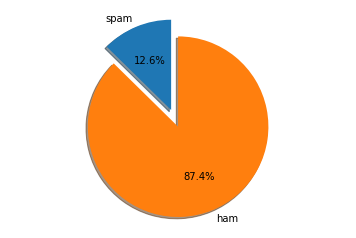

In [0]:
labels = ['spam','ham']
sizes = [spam_percentage, ham_percentage]
explode = (0.2, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  #Should be a Circle
plt.show()


### *Checking alternatively also:*

In [0]:
# Finding total length of the spam data using Count Vectoriser
def spam_text():
  count_v1 = CountVectorizer()
  spam_series1 = pd.Series(spam['text'])
  count_v1.fit_transform(spam_series1)
  all_spam_words = count_v1.get_feature_names() #Fetching all the tokens in the spam dataset
  #print("Length of Spam Data:",len(all_spam_words))
  def istext(all_spam_words):
    count1 = 0
    for i in all_spam_words:
      if i.isalpha():
        count1 = count1 +1
    return count1
  spam_word_count1 = istext(all_spam_words)
  return spam_word_count1, all_spam_words

In [0]:
no_of_texts_spam, all_spam_words = spam_text()
print("Textual Spam Data:",no_of_texts_spam)

Textual Spam Data: 1927


### *Percentage of text in Spam Data:*


In [0]:
textual_spam_data =((no_of_texts_spam/len(all_spam_words))*100)
print("Percentage of text in SPAM Data is {}%".format(round(textual_spam_data,2)))

Percentage of text in SPAM Data is 67.21%


In [0]:
# Finding total length of the ham data using Count Vectoriser
def ham_text():
  count_v2 = CountVectorizer()
  ham_series2 = pd.Series(ham['text'])
  count_v2.fit_transform(ham_series2)
  all_ham_words = count_v2.get_feature_names() #Fetching all the tokens in the ham dataset
  #print("Length of Ham Data:",len(all_ham_words))
  def istext(all_ham_words):
    count2 = 0
    for i in all_ham_words:
      if i.isalpha():
        count2 = count2 +1
    return count2
  ham_word_count = istext(all_ham_words)
  return ham_word_count, all_ham_words

In [0]:
no_of_texts_ham, all_ham_words = ham_text()
print("Textual Ham Data:",no_of_texts_ham)

Textual Ham Data: 6640


### *Percentage of text in Ham Data:*

In [0]:
textual_ham_data =((no_of_texts_ham/len(all_ham_words))*100)
print("Percentage of text in HAM Data is {}%".format(round(textual_ham_data,2)))

Percentage of text in HAM Data is 96.91%


### Data Visualisation:
#### *Text vs Others In Spam Data and Ham Data*

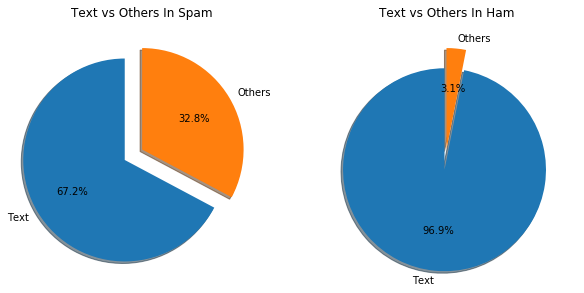

In [0]:
labels1 = ['Text','Others']
sizes1 = [textual_spam_data, 100 - textual_spam_data]
explode1 = (0.2, 0)

fig1,(ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,10)) #Creating SubPlots

ax1.pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('Text vs Others In Spam')


sizes2 = [textual_ham_data, 100 - textual_ham_data]
explode2 = (0.2, 0)
ax2.pie(sizes2, explode=explode2, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title('Text vs Others In Ham')


plt.show()

In [0]:
emails_v1['length'] = emails_v1['text'].apply(len)
emails_v1.head()

,text,target,length
0,"go until jurong point, crazy.. available only ...",ham,111
1,ok lar... joking wif u oni...,ham,29
2,free entry in 2 a wkly comp to win fa cup fina...,spam,155
3,u dun say so early hor... u c already then say...,ham,49
4,"nah i don't think he goes to usf, he lives aro...",ham,61


In [0]:
# The number of records are 5572. average length is 80. maximum length is 910.
#the message with length of 910 is

emails_v1[emails_v1['length']==910].text.iloc[0]

"for me the love should start with attraction.i should feel that i need her every time around me.she should be the first thing which comes in my thoughts.i would start the day and end it with her.she should be there every time i dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.i would cry for her.will give all my happiness and take all her sorrows.i will be ready to fight with anyone for her.i will be in love when i will be doing the craziest things for her.love will be when i don't have to proove anyone that my girl is the most beautiful lady on the whole planet.i will always be singing praises for her.love will be when i start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.i would like to say a lot..will tell later.."

In [0]:
#Storing the data here
emails_temp = emails_v1
print(emails_temp.shape)
print(emails_temp.head())

(5168, 3)
                                                text target  length
0  go until jurong point, crazy.. available only ...    ham     111
1                      ok lar... joking wif u oni...    ham      29
2  free entry in 2 a wkly comp to win fa cup fina...   spam     155
3  u dun say so early hor... u c already then say...    ham      49
4  nah i don't think he goes to usf, he lives aro...    ham      61


## Question-2:
### *Using count Vectorizer, fit the train data(70(ratio)).In the vocabulary got,find the longest token present.*

In [0]:
# Filtering the spam and ham mails and marking the spam as 1 and the others as 0.
#emails_v1.target[emails_v1.target == 'spam'] = 1
#emails_v1.target[emails_v1.target == 'ham'] = 0
#Giving Warning Alternative is: 
emails_v1['target'] = emails_v1.target.map({'spam':1,'ham':0})

In [0]:
print("Top 5 target records:\n",emails_v1['target'].head())
print("Count of target records:",emails_v1['target'].count())

Top 5 target records:
 0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int64
Count of target records: 5168


In [0]:
#Using sklearn train_test split the given dataset in ratio :70:30
X_train, X_test, y_train, y_test = train_test_split(emails_v1['text'], emails_v1['target'], test_size = 0.3,random_state = 100)

In [0]:
X_train.shape

(3617,)

In [0]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
#print("Training_data_shape_vectorizer:",X_train_cv.shape)
all_train_words = cv.get_feature_names() #Fetching all the tokens in the training dataset
#print(all_train_words)
def longest_token_CV(all_train_words):
    longest_token = []
    for word in all_train_words:
        if len(word) > len(longest_token):
            longest_token = word
    print("Longest Word:",longest_token)

In [0]:
longest_token_CV(all_train_words)

Longest Word: hypotheticalhuagauahahuagahyuhagga


# Question-3:
### *Transform the train data ,fitted with count vectorizer. Using multinomial Naive Bayes classifier fit the model taking smoothing alpha value appropriately. Using the test data,find the area under the curve (AUC) score.*

### *1) Analysis of Alpha Smoothing:*

In [0]:
# Implementing Mulyinomial Naive Bayes
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [0]:
def mnb_classifier():
  mnb_model = MultinomialNB(alpha = 0.3) # Appropriate alpha
  mnb_model.fit(X_train_cv, y_train.astype('int'))
  #Using Count Vectoriser
  #X_train_cv= cv.fit_transform(X_train) :>Already done before
  X_test_cv = cv.transform(X_test)
  y_pred = mnb_model.predict(X_test_cv)
  print("ACCURACY OF THE MULTINOMIAL NAIVE BAYES:",metrics.accuracy_score(y_test, y_pred))
  # Area Under The Curve:
  y_pred_prob = mnb_model.predict_proba(X_test_cv)[:,1] #Only for Spam
  #print("predicted Probabilities:",y_pred_prob)
  #Calculation of AUC Score
  print("AUC SCORE:",metrics.roc_auc_score(y_test,y_pred_prob))


In [0]:
mnb_classifier()

ACCURACY OF THE MULTINOMIAL NAIVE BAYES: 0.9858156028368794
AUC SCORE: 0.9774892124047263


# Adding the points - 4,5 and 6:
  4) Calculate the average length of documents for spam documents? 
  5) Calculate the average length of documents for not spam documents? 
  6) Find the average number of digits per document for not spam documents?


In [0]:
emails_v1['length'] = emails['text'].apply(len)

In [0]:
def avg_length(dataset) :
    
    print("the average length of documents for spam documents",dataset[dataset["target"]==1]["length"].mean())
    print("the average length of documents for ham documents",dataset[dataset["target"]==0]["length"].mean())

In [0]:
avg_length(emails_v1)

the average length of documents for spam documents 137.89127105666157
the average length of documents for ham documents 70.4673311184939


In [0]:
def count_digits(string):
    return sum(item.isdigit() for item in string)

emails_v1['digit_counts'] = emails_v1['text'].apply(count_digits)

In [0]:
def avg_num_digit(dataset,val):
     
    digit_count=dataset[dataset["target"]==val]["digit_counts"].sum()
    total_char_count=dataset[dataset["target"]==val]["length"].sum()
    return(float(digit_count)/float(total_char_count))

In [0]:
avg_count_digit_ham=avg_num_digit(emails_v1,0) 
print("the average number of digits per document for not spam documents",avg_count_digit_ham)

the average number of digits per document for not spam documents 0.0041205682675383454


# Adding the points - 7,8 and 9:
7) Find the average number of digits per document for spam documents?
8) Find the average number of non-word characters per document for spam documents?
9) Find the average number of non-word characters per document for not spam documents?


In [0]:
avg_count_digit_spam=float(avg_num_digit(emails_v1,1) )
print("the average number of digits per document for not spam documents",avg_count_digit_spam)

the average number of digits per document for not spam documents 0.11202425507812934


In [0]:
import re
t1 = emails_v1

In [0]:
t1['non_word_char_count'] = t1['text'].apply(lambda row: len(re.findall(r'\W', row)))

average_numof_nonword = t1.groupby('target')['non_word_char_count'].agg('mean').values

print('average number of non-word characters per document for spam documents',average_numof_nonword[0])

print('average number of non-word characters per document for not spam documents', average_numof_nonword[1])

average number of non-word characters per document for spam documents 17.121373200442967
average number of non-word characters per document for not spam documents 28.787136294027565


## Question 10:
## *Fit and transform the train data using Tfidf Vectorizer. Find 10 features each for the smallest and the largest tf-idf? Create 2 different series for these features,where each is sorted by tf-idf value and feature name(alphabetically)*

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
    


In [0]:
def tfidf_func():
  tfidf_vect = TfidfVectorizer()
  X_train_tfidf = tfidf_vect.fit_transform(X_train)
  #X_test_tfidf = tfidf_vect.transform(X_test)
  tfidf_feature_array = np.array(tfidf_vect.get_feature_names())
  tfidf_sorting = np.argsort(X_train_tfidf.toarray()).flatten()[::-1]
  n = 10
  top_n = tfidf_feature_array[tfidf_sorting][:n]
  last_n = tfidf_feature_array[tfidf_sorting][-n:]
  top_n.sort()
  last_n.sort()
  return (top_n, last_n)

In [0]:
top_10, bottom_n = tfidf_func()
print("Top 10 Tokens: \n",top_10,"\nBottom 10 Tokens: \n",bottom_n)

## Question 11:
### 11.Fit and transform train data using Tfidf Vectorizer and ignore terms with document frequency lower than 3. Using multinomial Naive Bayes classifier fit the model taking smoothing alpha value appropriately. Using the transformed test data,find the area under the curve (AUC) score.

In [0]:
def tfid_vect_3():
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn import metrics
    
    vector_tfid=TfidfVectorizer(min_df=3).fit(X_train.ravel())
    X_train_tfid_token=vector_tfid.transform(X_train.ravel())
    X_test_tfid_token=vector_tfid.transform(X_test.ravel())
    
    

    nb = MultinomialNB(alpha=0.1)
    clf= nb.fit(X_train_tfid_token, y_train)
    y_pred = clf.predict(X_test_tfid_token)
    
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    
    print(metrics.confusion_matrix(y_test, y_pred))
    
    y_pred_prob = clf.predict_proba(X_test_tfid_token)[:, 1]
    # calculate AUC
    score=metrics.roc_auc_score(y_test, y_pred_prob)
    return(score)
auc_3fre_score=tfid_vect_3()
print("AUC mNV with document frequency lower than 3 is",auc_3fre_score)

Accuracy: 0.9819471308833011
[[1366    4]
 [  24  157]]
AUC mNV with document frequency lower than 3 is 0.9870992458765173


# Question 12:
### 12.Fit and transform train data using Tfidf Vectorizer and ignore terms with document frequency lower than 5. With the document-term matrix achieved and an additional feature, the length of document (number of characters), fit a Support Vector Classification model with appropriately taken regularization value. Using the transformed test data,find the area under the curve (AUC) score.

In [0]:
def tfid_svm_5():
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn import svm
    from sklearn import metrics
    
    vector_tfid=TfidfVectorizer(min_df=5).fit(X_train.ravel())
    X_train_tfid_token=vector_tfid.transform(X_train.ravel())
    X_test_tfid_token=vector_tfid.transform(X_test.ravel())
    

    svm = svm.SVC(kernel='sigmoid',C = 5000)
    clf= svm.fit(X_train_tfid_token, y_train)
    y_pred = clf.predict(X_test_tfid_token)
    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))
    # calculate AUC
    score=metrics.roc_auc_score(y_test, y_pred)
    return(score)
auc_5svm_score = tfid_svm_5()
print("AUC SVM with document frequency lower than 5 is",auc_5svm_score)

0.9851708575112831
[[1367    3]
 [  20  161]]
AUC SVM with document frequency lower than 5 is 0.9436564907045206


## Question 13:
### *Fit and transform train data using Count Vectorizer and ignore terms with document frequency lower than 5 and use word n-grams from n=2 to n=5. With the document-term matrix achieved and an additional feature, `the length of document (number of characters)`, fit a Logistic Regression model with appropriately taken regularization value. Using the transformed test data,find the area under the curve (AUC) score. ** Use character n-grams pass the parameter in analyzer='char_wb' which creates character n-grams only from text inside word boundaries. It makes the model more robust to spelling mistakes. Also, find 10 smallest and largest coefficients from the model along with the AUC score*

In [0]:
# Implementing logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [0]:

cv_char_wb = CountVectorizer(ngram_range=(2, 5), analyzer='char_wb', min_df=5)
X_train_cv_wb = cv_char_wb.fit_transform(X_train)
X_test_cv_wb = cv_char_wb.transform(X_test)
count_feature_array = np.array(cv_char_wb.get_feature_names())
  

In [0]:
def log_reg():
  log_model = LogisticRegression(solver='liblinear') # Why liblinear
  log_model.fit(X_train_cv_wb, y_train.astype('int'))
  #Using Count Vectoriser
  #X_train_cv= cv.fit_transform(X_train) :>Already done before
  #X_test_cv_wb = cv_char_wb.transform(X_test)
  y_pred = log_model.predict(X_test_cv_wb)
  print("ACCURACY OF THE Logistic Regression Model:",metrics.accuracy_score(y_test, y_pred))
  # Area Under The Curve:
  y_pred_prob = log_model.predict_proba(X_test_cv_wb)[:,1] #Only for Spam
  #print("predicted Probabilities:",y_pred_prob)
  #Calculation of AUC Score
  print("AUC SCORE:",metrics.roc_auc_score(y_test,y_pred_prob))

In [0]:
log_reg()

ACCURACY OF THE Logistic Regression Model: 0.9890393294648614
AUC SCORE: 0.9837117393233052


In [0]:
count_feature_array = np.array(cv_char_wb.get_feature_names())
count_sorting = np.argsort(X_train_cv_wb.toarray()).flatten()[::-1]
n = 10
top_n = count_feature_array[count_sorting][:n]
last_n = count_feature_array[count_sorting][-n:]
top_n.sort()
last_n.sort()
print("Top 10 Features:",top_n,"\n----\n","Bottom 10 Features:",last_n)

Top 10 Features: [' d' ' to' 'ar ' 'cu' 'de' 'dire' 'direc' 'ec' 'rect' 't '] 
----
 Bottom 10 Features: [' !' 'nded' 'nded ' 'nder' 'nder ' 'nderf' 'nderi' 'nders' 'ndi' 'ndia']


# Few more Observations:

count    5168.000000
mean       78.986649
std        58.238566
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: length, dtype: float64

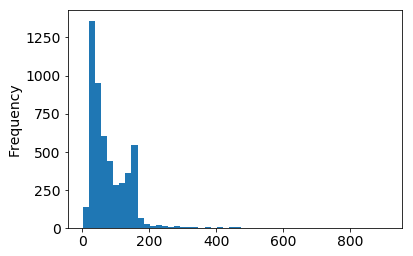

In [0]:
#matplotlib Data Visualisation
emails_v1['length'].plot(bins=50,kind='hist')
emails_v1.length.describe()
# The number of records are 5572. average length is 80. maximum length is 910.
#the message with length of 910 is

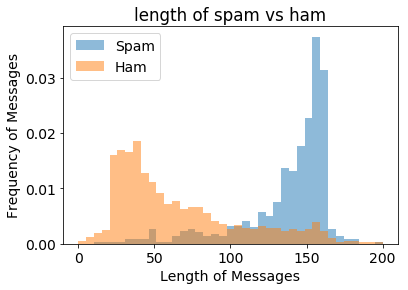

In [0]:
emails_v1[emails_v1['length']==910].text.iloc[0]

#we can see that spam has more number of character
bins=np.linspace(0,200,40)
plt.hist(emails_v1[emails_v1["target"]==1]['length'],bins,alpha=0.5,density=True,label='Spam')
plt.hist(emails_v1[emails_v1["target"]==0]['length'],bins,alpha=0.5,density=True,label='Ham')
plt.title("length of spam vs ham")
plt.xlabel("Length of Messages")
plt.ylabel("Frequency of Messages")
plt.legend(loc= 'best')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


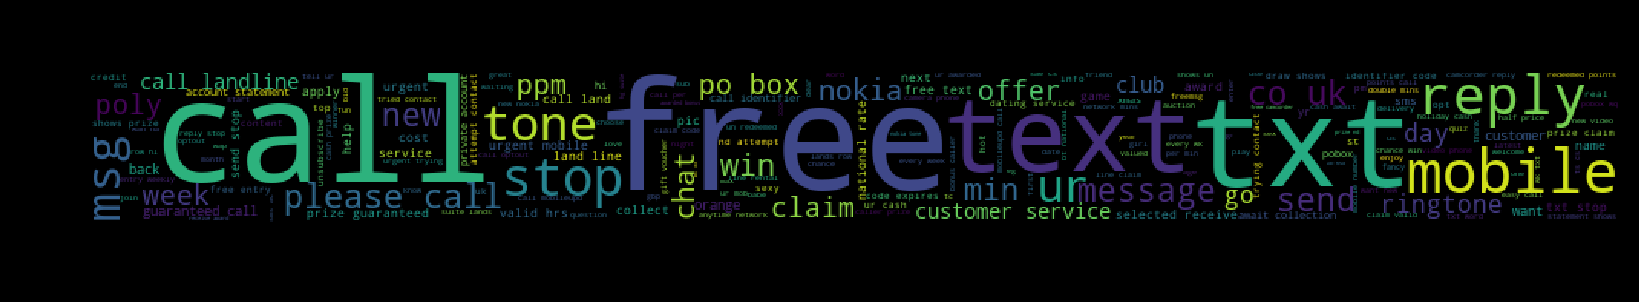

In [0]:
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
nltk.download('stopwords')


def tokenz(x):
    spams = ' '.join(x).lower()
    spams = re.sub('[^a-z]+', ' ', spams)
    spams = nltk.word_tokenize(spams)
    spams = [i for i in spams if len(i) > 1]

    #stop_words = list(get_stop_words('en'))
    stop_words = stopwords.words('english')
    spams_tokenize = [word for word in spams if word not in stop_words]
    spams_tokenize = ' '.join(spams_tokenize)
    return spams_tokenize

spam_words = tokenz(emails_v1[emails_v1["target"]==1]["text"])
ham_words =  tokenz(emails_v1[emails_v1["target"]==0]["text"])

wc = WordCloud(width=1000,height=100)

cld = wc.generate(spam_words)
plt.figure(figsize=(8,4), dpi=200, facecolor='k')
plt.imshow(cld)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WordCloud for Spam message')
plt.show()




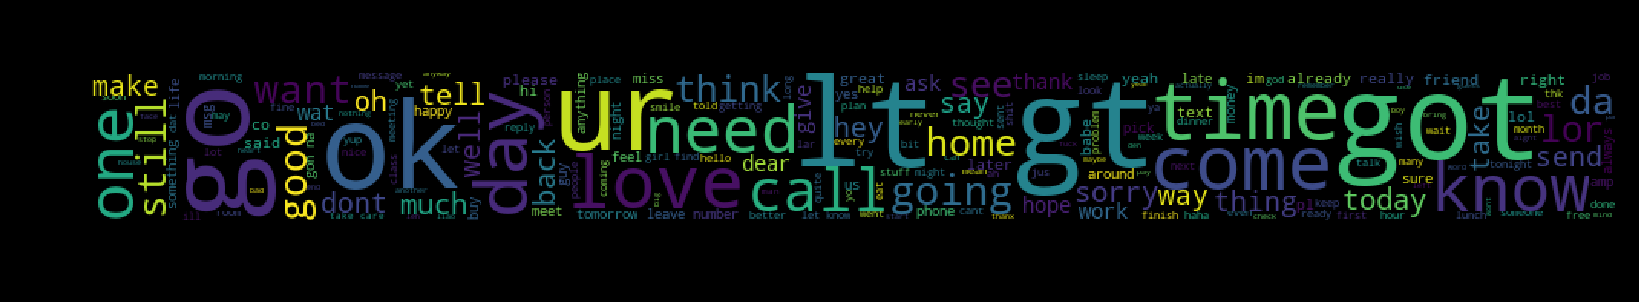

In [0]:
cld = wc.generate(ham_words)
plt.figure(figsize=(8,4), dpi=200, facecolor='k')
plt.imshow(cld)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WordCloud for Ham message')
plt.show()

# Few more Observations:

In [0]:
cv_char_wb = CountVectorizer(ngram_range=(2, 5), analyzer='char_wb', min_df=5)
X_train_cv_wb = cv_char_wb.fit_transform(X_train)
X_test_cv_wb = cv_char_wb.transform(X_test)
count_feature_array = np.array(cv_char_wb.get_feature_names())
log_model = LogisticRegression(solver='liblinear') # Why liblinear
log_model.fit(X_train_cv_wb, y_train.astype('int'))
y_pred = log_model.predict(X_test_cv_wb)
print("ACCURACY OF THE Logistic Regression Model:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
# Area Under The Curve:
y_pred_prob = log_model.predict_proba(X_test_cv_wb)[:,1] #Only for Spam
#print("predicted Probabilities:",y_pred_prob)
#Calculation of AUC Score
print("AUC SCORE:",metrics.roc_auc_score(y_test,y_pred_prob))
print(y_pred_prob)

ACCURACY OF THE Logistic Regression Model: 0.9890393294648614
[[1368    2]
 [  15  166]]
AUC SCORE: 0.9837117393233052
[4.77092591e-04 9.98896124e-01 5.19910615e-06 ... 6.53865742e-07
 7.89193858e-05 3.64935757e-03]


In [0]:
#Adjusting the classification Threshold:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'Frequency')

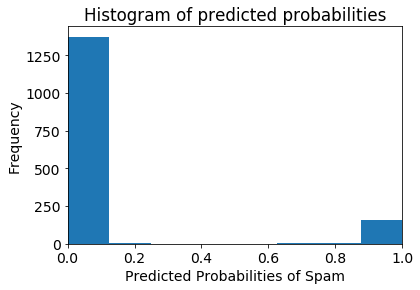

In [0]:
#Histograms of Predicted Probabilities:y_pred_prob = log_reg_ana()
plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted Probabilities of Spam')
plt.ylabel('Frequency')

## Increasing the Threshold for Predicting Spam in order to increase the "Specificity" of the Classifier:

In [0]:
#On Increasing the threshold lets work:
from sklearn.preprocessing import binarize
y_pred_prob = y_pred_prob.reshape(1,-1)
y_pred_class = binarize(y_pred_prob, 0.8)[0]


In [0]:
print(y_test.shape)
print(y_pred_class.shape)

(1551,)
(1551,)


In [0]:
print(metrics.confusion_matrix(y_test, y_pred_class))
print("ACCURACY OF Customized Logistic Regression Model:",metrics.accuracy_score(y_test, y_pred_class))
print("AUC SCORE:",metrics.roc_auc_score(y_test,y_pred_class))

[[1369    1]
 [  18  163]]
ACCURACY OF Customized Logistic Regression Model: 0.9877498388136686
AUC SCORE: 0.949911279590273


# Hence We have got a best fitted model with about 98.7% accuracy using Logistic regression with AUC Score of 94.9.